<a href="https://colab.research.google.com/github/ydev365/statistical_analysis/blob/main/chap05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이산형 확률분포

## 1차원 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### 1차원 이산확률분포의 정의

In [2]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [3]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
X = [x_set, f]

In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{np.int64(1): np.float64(0.047619047619047616),
 np.int64(2): np.float64(0.09523809523809523),
 np.int64(3): np.float64(0.14285714285714285),
 np.int64(4): np.float64(0.19047619047619047),
 np.int64(5): np.float64(0.23809523809523808),
 np.int64(6): np.float64(0.2857142857142857)}

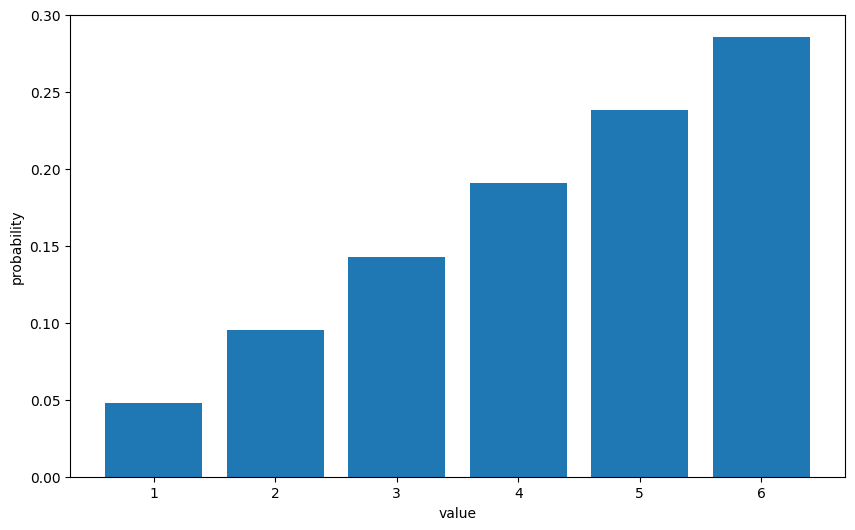

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [7]:
np.all(prob >= 0)

np.True_

In [8]:
np.sum(prob)

np.float64(0.9999999999999999)

In [ ]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [ ]:
F(3)

0.2857142857142857

In [ ]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 1차원 이산형 확률변수의 지표

#### 평균

In [ ]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [ ]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334756

In [ ]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [ ]:
E(X)

4.333333333333333

In [ ]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [ ]:
2 * E(X) + 3

11.666666666666666

#### 분산

In [ ]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [ ]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
V(X)

2.2222222222222223

In [ ]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [ ]:
2**2 * V(X)

8.88888888888889

## 2차원 이산형 확률분포

### 2차원 이산형 확률분포의 정의

In [ ]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [ ]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [ ]:
XY = [x_set, y_set, f_XY]

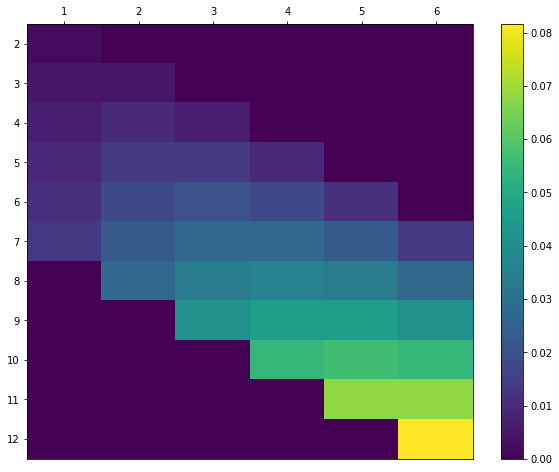

In [ ]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [ ]:
np.all(prob >= 0)

True

In [ ]:
np.sum(prob)

1.0

In [ ]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [ ]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [ ]:
X = [x_set, f_X]
Y = [y_set, f_Y]

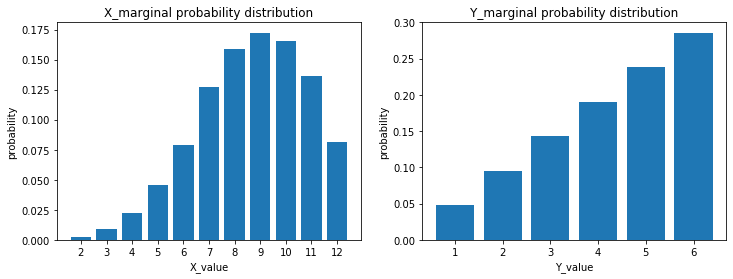

In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률분포의 지표

In [ ]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [ ]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [ ]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [ ]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

In [ ]:
a, b = 2, 3

In [ ]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [ ]:
a * mean_X + b * mean_Y

30.333333333333332

In [ ]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [ ]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [ ]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [ ]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.2222222222222223

In [ ]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [ ]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [ ]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [ ]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [ ]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474